In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
# Importing Data set
df=pd.read_csv('/content/sample_data/netflix_titles.csv')
# Reading first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [406]:
# Checking shape of the dataset
df.shape

(8807, 12)

Rows/ Samples/Data points : 8807

Columns : 12

In [407]:
# Checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We can observe that there are some nulls in the columns : director, cast, country, date_added, rating, duration

In [408]:
# Checking null values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [409]:
# Dropping null values of columns: date_added, rating, duration
df= df.loc[~df['rating'].isna()]
df= df.loc[~df['duration'].isna()]
df= df.loc[~df['date_added'].isna()]
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns after deleting null vales.')

Dataset contains 8790 rows and 12 columns after deleting null vales.


In [410]:
# Filling the remaining null values with NA
df.fillna('NA',inplace=True)

In [411]:
# Checking duplicate values
df.duplicated().sum()

0

There are no duplicates in the dataset

In [412]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8790,4527,7679,749,1765,14,220,513,8758
top,s1,Movie,Dick Johnson Is Dead,NA,NA,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2621,825,2809,109,3205,1791,362,4


In [413]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Most of them are Movies in the netflix

In [414]:
# Total Country counts
df['country'].value_counts()

United States                             2809
India                                      972
NA                                         829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

US makes the most Movies/TV Shows followed by India and UK.

In [415]:
# Country counts based on type = Movie
df.loc[df['type']=='Movie']['country'].value_counts()

United States                            2055
India                                     893
NA                                        439
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

Most of the movies are made in US, India and UK.

In [416]:
# Country counts based on type = TV Show
df.loc[df['type']=='TV Show']['country'].value_counts()

United States                                    754
NA                                               390
United Kingdom                                   212
Japan                                            167
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

Most of the TV shows are made in US, UK and Japan.

In [417]:
df['director'].value_counts()

NA                                2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [418]:
df.loc[df['director']=='Rajiv Chilaka']['type'].value_counts()

Movie    19
Name: type, dtype: int64

In [419]:
df.loc[df['director']=='Raúl Campos, Jan Suter']['type'].value_counts()

Movie    18
Name: type, dtype: int64

In [420]:
df.loc[df['director']=='Suhas Kadav']['type'].value_counts()

Movie    16
Name: type, dtype: int64

In [421]:
df.loc[df['director']=='Marcus Raboy']['type'].value_counts()

Movie      15
TV Show     1
Name: type, dtype: int64

Top directors are making movies more than TV Shows.

In [422]:
df['listed_in'].value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

Top 3 genre availbale in Netflix are International Dramas, Documentries and Stand-up comedy.

In [423]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

Most of the Movies/TV shows were made in 2018,2017 and 2019.

# **Un-nesting of the columns - cast, director, country, listed_in**

In [424]:
cast_df = df['cast'].str.split(',',expand =True)
cast_df.columns = ['cast-' + str(x) for x in range(1, cast_df.shape[1]+1)]

dir_df = df['director'].str.split(',',expand =True)
dir_df.columns = ['director-' + str(x) for x in range(1, dir_df.shape[1]+1)]

coun_df = df['country'].str.split(',',expand = True)
coun_df.columns = ['country-' + str(x) for x in range(1, coun_df.shape[1]+1)]

gen_df = df['listed_in'].str.split(',',expand = True)
gen_df.columns = ['genre-'+ str(x) for x in range(1, gen_df.shape[1]+1)]

In [425]:
df_new=pd.concat([df,cast_df,dir_df,coun_df,gen_df],axis=1)
df_new.drop(columns=['cast','director','country','listed_in'],inplace=True)
df_new.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast-1,cast-2,...,country-6,country-7,country-8,country-9,country-10,country-11,country-12,genre-1,genre-2,genre-3
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NA,None,...,None,None,None,None,None,None,None,Documentaries,None,None
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Khosi Ngema,...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Sami Bouajila,Tracy Gotoas,...,None,None,None,None,None,None,None,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",NA,None,...,None,None,None,None,None,None,None,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,Mayur More,Jitendra Kumar,...,None,None,None,None,None,None,None,International TV Shows,Romantic TV Shows,TV Comedies


In [426]:
df_new.columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'description', 'cast-1', 'cast-2', 'cast-3', 'cast-4',
       'cast-5', 'cast-6', 'cast-7', 'cast-8', 'cast-9', 'cast-10', 'cast-11',
       'cast-12', 'cast-13', 'cast-14', 'cast-15', 'cast-16', 'cast-17',
       'cast-18', 'cast-19', 'cast-20', 'cast-21', 'cast-22', 'cast-23',
       'cast-24', 'cast-25', 'cast-26', 'cast-27', 'cast-28', 'cast-29',
       'cast-30', 'cast-31', 'cast-32', 'cast-33', 'cast-34', 'cast-35',
       'cast-36', 'cast-37', 'cast-38', 'cast-39', 'cast-40', 'cast-41',
       'cast-42', 'cast-43', 'cast-44', 'cast-45', 'cast-46', 'cast-47',
       'cast-48', 'cast-49', 'cast-50', 'director-1', 'director-2',
       'director-3', 'director-4', 'director-5', 'director-6', 'director-7',
       'director-8', 'director-9', 'director-10', 'director-11', 'director-12',
       'director-13', 'country-1', 'country-2', 'country-3', 'country-4',
       'country-5', 'country-6', 'c

In [427]:
print(f'Shape of original dataframe- {df.shape}')
print(f'Shape of new dataframe- {df_new.shape}')

Shape of original dataframe- (8790, 12)
Shape of new dataframe- (8790, 86)


**Un-nesting cast column**

In [428]:
cols_req = [col for col in df_new.columns if(('cast' in col)==False)]
# columns required while melting of cast column
print(cols_req)

['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description', 'director-1', 'director-2', 'director-3', 'director-4', 'director-5', 'director-6', 'director-7', 'director-8', 'director-9', 'director-10', 'director-11', 'director-12', 'director-13', 'country-1', 'country-2', 'country-3', 'country-4', 'country-5', 'country-6', 'country-7', 'country-8', 'country-9', 'country-10', 'country-11', 'country-12', 'genre-1', 'genre-2', 'genre-3']


In [429]:
df_new=pd.melt(df_new,id_vars=cols_req,var_name ='cast-x', value_name ='cast')

In [430]:
print('Shape of new dataframe after melting of cast-',df_new.shape)

Shape of new dataframe after melting of cast- (439500, 38)


In [431]:
df_new = df_new.loc[~df_new['cast'].isna()].reset_index()

In [432]:
print('Shape of new dataframe after dropping null values in cast column-',df_new.shape)

Shape of new dataframe after dropping null values in cast column- (64841, 39)


In [433]:
df_new.drop(columns=['index','cast-x'],inplace=True)

**Un-nesting director column**

In [434]:
cols_req=[col for col in df_new.columns if(('director' in col)==False)]

df_new=pd.melt(df_new, id_vars = cols_req, var_name ='director-x', value_name ='director')

print('\n','Shape of new dataframe after melting of director-',df_new.shape)


 Shape of new dataframe after melting of director- (842933, 26)


In [435]:
df_new = df_new.loc[~ df_new['director'].isna()].reset_index()

df_new.drop(columns=['index','director-x'], inplace = True)

print('Shape of new dataframe after dropping null values in director column-', df_new.shape)

Shape of new dataframe after dropping null values in director column- (70702, 25)


**Un-nesting country column**

In [436]:
cols_req=[col for col in df_new.columns if(('country'in col)==False)]
df_new=pd.melt(df_new,id_vars=cols_req, var_name ='country-x', value_name ='country')
print('\n','Shape of new dataframe after melting of country-', df_new.shape)
df_new = df_new.loc[~df_new['country'].isna()].reset_index()
df_new.drop(columns=['index','country-x'],inplace=True)
print('Shape of new dataframe after dropping null values in country column',df_new.shape)


 Shape of new dataframe after melting of country- (848424, 15)
Shape of new dataframe after dropping null values in country column (89305, 14)


**Un-nesting listed_in column**

In [437]:
cols_req=[col for col in df_new.columns if(('genre'in col)==False)]
df_new=pd.melt(df_new,id_vars=cols_req, var_name ='genre-x', value_name ='genre')
print('\n','Shape of new dataframe after melting of genre-',df_new.shape)
df_new = df_new.loc[~df_new['genre'].isna()].reset_index()
df_new.drop(columns=['index','genre-x'],inplace=True)
print('Shape of new dataframe after dropping null values in genre column', df_new.shape)


 Shape of new dataframe after melting of genre- (267915, 13)
Shape of new dataframe after dropping null values in genre column (201837, 12)


In [438]:
df_new.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NA,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NA,South Africa,International TV Shows
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Sami Bouajila,Julien Leclercq,NA,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",NA,NA,NA,Docuseries
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,Mayur More,NA,India,International TV Shows


# **Basic Analysis**

In [439]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201837 entries, 0 to 201836
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201837 non-null  object
 1   type          201837 non-null  object
 2   title         201837 non-null  object
 3   date_added    201837 non-null  object
 4   release_year  201837 non-null  int64 
 5   rating        201837 non-null  object
 6   duration      201837 non-null  object
 7   description   201837 non-null  object
 8   cast          201837 non-null  object
 9   director      201837 non-null  object
 10  country       201837 non-null  object
 11  genre         201837 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [440]:
df_new.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
cast            0
director        0
country         0
genre           0
dtype: int64

In [441]:
df_new[df_new.duplicated()]

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
27367,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,Denmark,Dramas
30730,s1632,Movie,Rust Creek,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...,Micah Hauptman,Jen McGowan,United States,Thrillers
75012,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,France,Dramas
84263,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,Poland,Dramas
111697,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,Denmark,International Movies
150499,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,France,International Movies
157995,s6014,Movie,300 Miles to Heaven,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br...",Adrianna Biedrzyńska,Maciej Dejczer,Poland,International Movies


In [442]:
df_new.drop_duplicates(inplace=True)

In [443]:
df.duplicated().sum()

0

In [444]:
df_new['date_added']=pd.to_datetime(df_new['date_added'])

df_new['month_added']=df_new['date_added'].dt.month
df_new['mon_name_added']=df_new['date_added'].dt.month_name()
df_new['year_added']=df_new['date_added'].dt.year

In [445]:
df_new.isna().sum()

show_id           0
type              0
title             0
date_added        0
release_year      0
rating            0
duration          0
description       0
cast              0
director          0
country           0
genre             0
month_added       0
mon_name_added    0
year_added        0
dtype: int64

In [446]:
df_new.describe().round(2)

,release_year,month_added,year_added
count,201830.00,201830.00,201830.00
mean,2013.45,6.64,2018.97
std,9.02,3.44,1.55
min,1925.00,1.00,2008.00
25%,2012.00,4.00,2018.00
50%,2016.00,7.00,2019.00
75%,2019.00,10.00,2020.00
max,2021.00,12.00,2021.00


In [447]:
df_new.describe(include=object)

,show_id,type,title,rating,duration,description,cast,director,country,genre,mon_name_added
count,201830,201830,201830,201830,201830,201830,201830,201830,201830,201830,201830
unique,8790,2,8790,14,220,8758,39249,5119,198,73,12
top,s7165,Movie,Kahlil Gibran's The Prophet,TV-MA,1 Season,A troubled young girl and her mother find sola...,NA,NA,United States,International Movies,July
freq,700,145898,700,73883,34977,700,2149,50425,49780,27138,20302


# **Non-Graphical Analysis**

In [448]:
df_new.nunique()

show_id            8790
type                  2
title              8790
date_added         1713
release_year         74
rating               14
duration            220
description        8758
cast              39249
director           5119
country             198
genre                73
month_added          12
mon_name_added       12
year_added           14
dtype: int64

In [449]:
df_new['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [450]:
df_new['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [451]:
df_new1=df_new.drop_duplicates(subset='title', keep="first")

In [452]:
df_new1['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [453]:
df_new1['duration'].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [454]:
df_new1.loc[df_new1['duration'].str.contains('Season')]['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [455]:
df_new1.loc[df_new1['duration'].str.contains('min')]['duration'].value_counts().head(5)

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [456]:
df_new1['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [457]:
df_new1.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2018            767
         2017            765
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [458]:
df_new1.loc[(df_new1['release_year']>=2015) & (df_new1['release_year']<=2022)].groupby('type')['release_year'].value_counts()

type     release_year
Movie    2018            767
         2017            765
         2016            658
         2019            633
         2020            517
         2015            396
         2021            277
TV Show  2020            436
         2019            397
         2018            379
         2021            315
         2017            265
         2016            243
         2015            159
Name: release_year, dtype: int64

In [459]:
df_new1.loc[(df_new1['release_year']>=2015) & (df_new1['release_year']<=2022)].groupby('type')['release_year'].count()

type
Movie      4013
TV Show    2194
Name: release_year, dtype: int64

65% Movies released in the years -(2015-2021) & 82% TV Shows released in the years -(2015-2021) Netfl ix is focusing more on TV Shows thanMovies in recent years.

In [460]:
df_new['country']=df_new['country'].str.strip()
df_new['country'].value_counts().head(10)

United States     59262
India             22814
United Kingdom    12938
NA                11894
Japan              8599
France             8252
Canada             7915
Spain              5315
South Korea        5043
Germany            4383
Name: country, dtype: int64

In [461]:
def type_group(data):
   return data.groupby('type')['title'].count()

In [462]:
df_new.groupby('country').apply(type_group)

country       type   
              Movie       98
              TV Show      8
Afghanistan   Movie        2
Albania       Movie        8
Algeria       Movie       77
                        ... 
Venezuela     Movie       28
Vietnam       Movie      134
West Germany  Movie       64
              TV Show     27
Zimbabwe      Movie       42
Name: title, Length: 186, dtype: int64

In [463]:
df_new1['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [464]:
df_new['genre']=df_new['genre'].str.strip()
df_new['genre'].value_counts()

Dramas                          29796
International Movies            28240
Comedies                        20829
International TV Shows          12815
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7106
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

# **Visual Analysis**

Text(0.5, 1.0, 'Categories in Netflix')

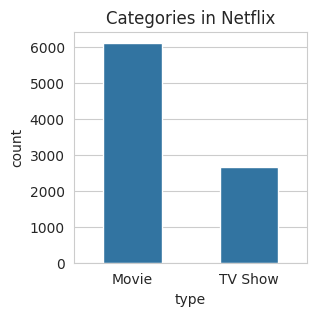

In [465]:
plt.figure(figsize=(3,3))
sns.set_style("whitegrid")
sns.countplot(df_new1,x='type',width=0.5)
plt.title('Categories in Netflix')

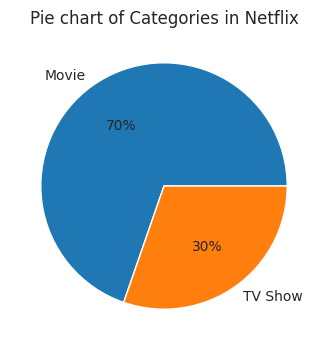

In [466]:
plt.figure(figsize=(4,4))
plt.pie(df_new1['type'].value_counts(),labels =df_new1['type'].unique(),autopct='%.0f%%')
plt.title('Pie chart of Categories in Netflix')
plt.show()

No. of movies are more than TV Shows in Netfl ix - 70% are movies and 30% TV Shows

**Visual analysis on Duration of Movies & TV Shows**

<ipython-input-467-4076079d6375>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=movies_dur_int,color='b')


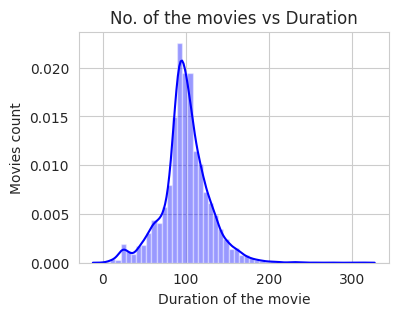

In [467]:
import numpy as np
movies_df=df_new1.loc[df_new1['type']=='Movie']

movies_dur_int=[]
for y in movies_df.loc[~movies_df['duration'].isna()]['duration']:
  temp=y.split()
  movies_dur_int.append(int(temp[0]))

plt.figure(figsize=(4,3))
sns.distplot(x=movies_dur_int,color='b')
plt.xlabel('Duration of the movie')
plt.ylabel('Movies count')
plt.title('No. of the movies vs Duration')
plt.show()

In [468]:
movies_df1=pd.DataFrame({'Duration':movies_dur_int})
total_movies=movies_df1['Duration'].count()

In [469]:
C1=movies_df1.loc[(movies_df1['Duration']>=90) & (movies_df1['Duration']<=150)]['Duration'].count()
C2=movies_df1.loc[movies_df1['Duration']>150]['Duration'].count()
C3=movies_df1.loc[movies_df1['Duration']<90]['Duration'].count()

print('Total Movies ',total_movies)

print('Movies whose duration less than 90 min & its percentage -',C3,',',np.round((C3*100)/total_movies,2),'%')
print('Movies whose duration between [90,150] & its percentage -',C1,',',np.round((C1*100)/total_movies,2),'%')
print('Movies whose duration greater than 150 min & its percentage -',C2,',',np.round((C2*100)/total_movies,2),'%')

Total Movies  6126
Movies whose duration less than 90 min & its percentage - 1837 , 29.99 %
Movies whose duration between [90,150] & its percentage - 4044 , 66.01 %
Movies whose duration greater than 150 min & its percentage - 245 , 4.0 %


66% movies have duration between 90 & 150 min. 30% movies have duration <90 min.

Median value of the duration of the movies - 98.0


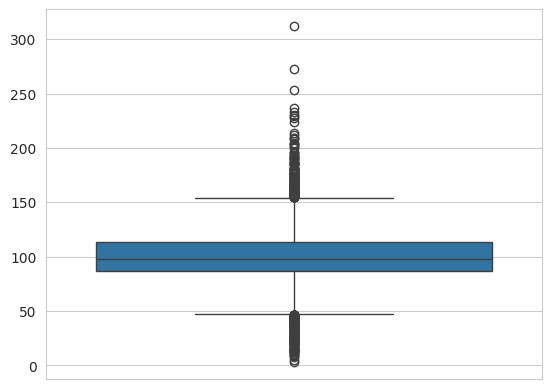

In [470]:
print('Median value of the duration of the movies -',np.median(np.array(movies_dur_int)))
sns.boxplot(data=movies_dur_int)
plt.show()

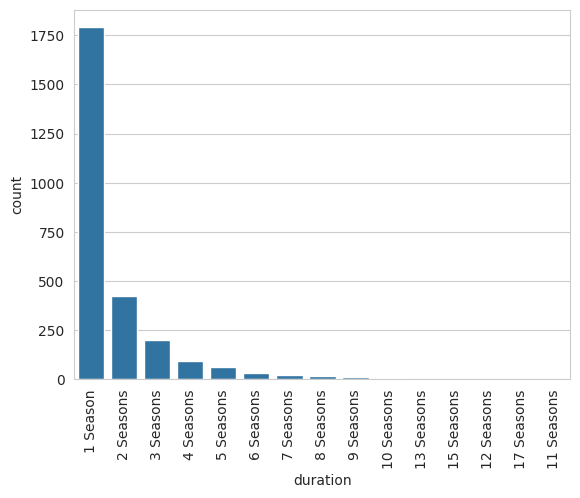

In [471]:
TV_show=df_new1.loc[df_new1['type']=='TV Show']
TV_show=TV_show.fillna('NA')

sns.countplot(data=TV_show,x='duration',order=TV_show['duration'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [472]:
T1=TV_show['duration'].value_counts().sum()
print('Total TV Shows - ',T1)
T2=TV_show.loc[TV_show['duration']=='1 Season']['duration'].value_counts().sum()
print('TV Shows having only 1 Season - ',T2)
T3=TV_show.loc[TV_show['duration']=='2 Seasons']['duration'].value_counts().sum()
print('TV Shows having only 2 Seasons - ',T3)
print('Percentage of Seasons 1&2 - ',np.round((T2+T3)*100/T1,2))

Total TV Shows -  2664
TV Shows having only 1 Season -  1791
TV Shows having only 2 Seasons -  421
Percentage of Seasons 1&2 -  83.03


83% of TV shows have seasons 1 or 2.

**Visual analysis on Movies/TV Shows addes in all years**

Text(0.5, 1.0, 'Movies & TV Shows added in the year')

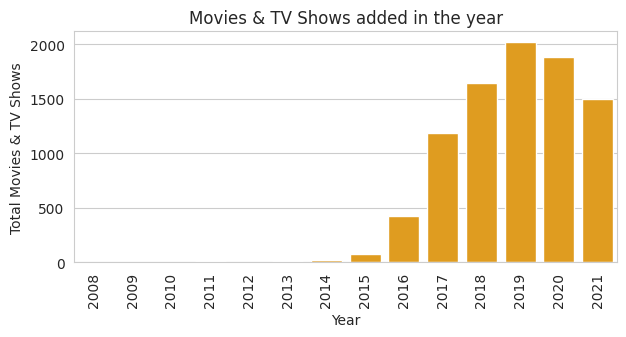

In [473]:
plt.figure(figsize=(7,3))
sns.countplot(data=df_new1,x='year_added',color='orange')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Total Movies & TV Shows')
plt.title('Movies & TV Shows added in the year')

Highest no. of Movies & TV Shows were added in year 2019. In year 2020 and 2021, there were less Movies & TV Shows were released due toCovid-19 and therefore less no. of movies were added after year 2019.

Text(0.5, 1.0, 'No. of Movies/TV Shows added in the year')

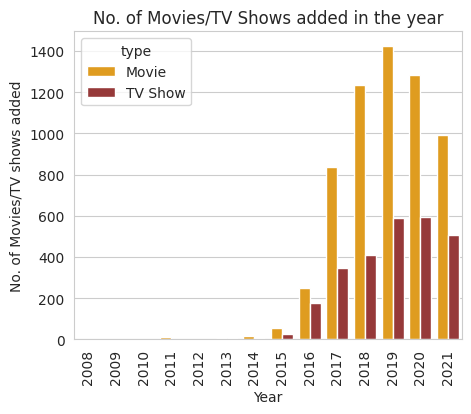

In [474]:
plt.figure(figsize=(5,4))
sns.countplot(df_new1,x='year_added',hue='type',palette=['orange','brown'])
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('No. of Movies/TV shows added')
plt.title('No. of Movies/TV Shows added in the year')

Number of movies added is highest in 2019 followed by 2020 and 2018. Number of TV Shows added is highest in 2020 followed by 2019 and 2021 We can observe that popularity of TV Shows was increased in Covid time.The increase in time at home, the rise of streaming services, andthe popularity of binge-watching all contributed to this trend.

**Visual analysis on Movies/TV Shows added in months**

**Movies**

Text(0.5, 1.0, 'Movies added in the month')

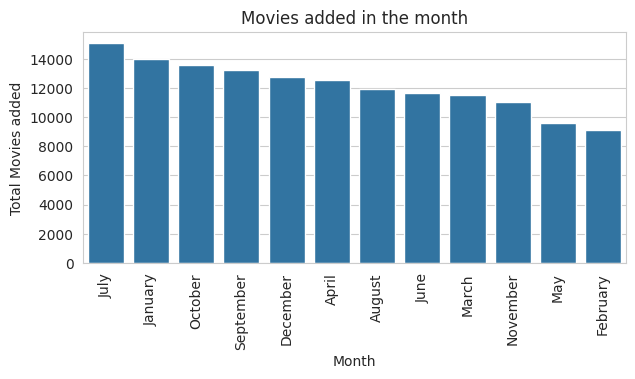

In [475]:
plt.figure(figsize=(7,3))
m_df = df_new.loc[df_new['type']=='Movie']
sns.barplot(y=m_df['mon_name_added'].value_counts(),x=m_df['mon_name_added'].value_counts().index)
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Total Movies added')
plt.title('Movies added in the month')

<Axes: xlabel='month_added', ylabel='genre'>

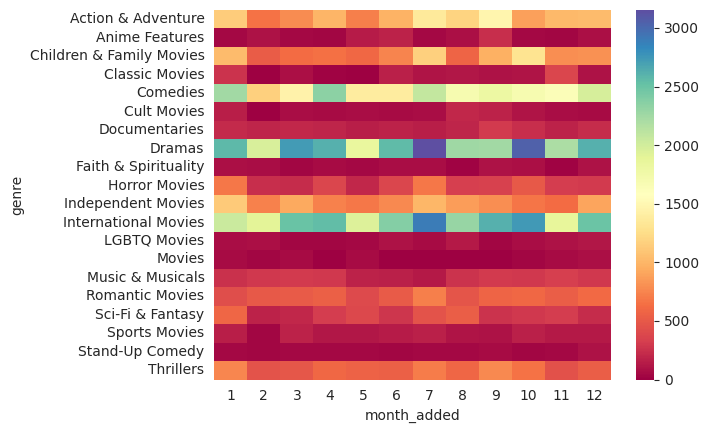

In [476]:
sns.heatmap(pd.crosstab(m_df['genre'],m_df['month_added']),cmap='Spectral')

Most of the Movies were added in July, January & December.

**TV Shows**

Text(0.5, 1.0, 'TV Shows added in the month')

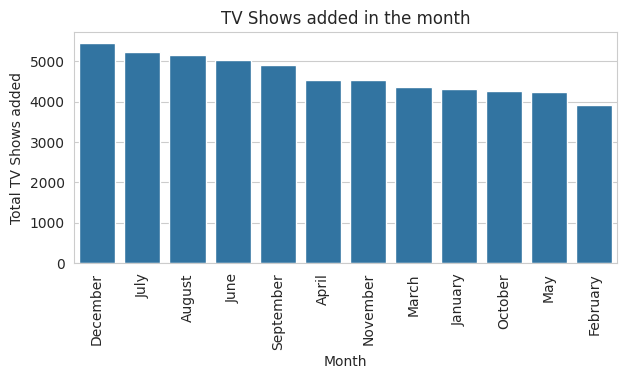

In [477]:
plt.figure(figsize=(7,3))
t_df = df_new.loc[df_new['type']=='TV Show']
sns.barplot(y=t_df['mon_name_added'].value_counts(),x=t_df['mon_name_added'].value_counts().index)
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Total TV Shows added')
plt.title('TV Shows added in the month')

Most of the TV shows were added in month December, July, August.

<Axes: xlabel='month_added', ylabel='genre'>

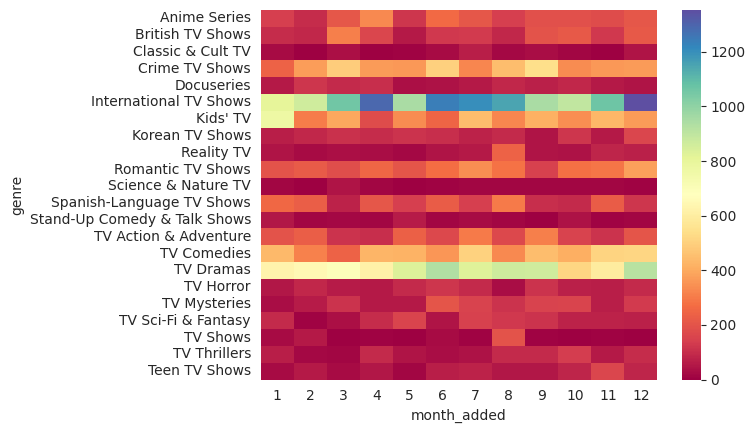

In [478]:
sns.heatmap(pd.crosstab(t_df['genre'],t_df['month_added']),cmap='Spectral')

According to the data, most of the shows were added in month of December & July. Therefore, best time to launch a show is in the month ofDecemeber, July & August.

**Visual analysis on Movies/TV Shows released in all years**

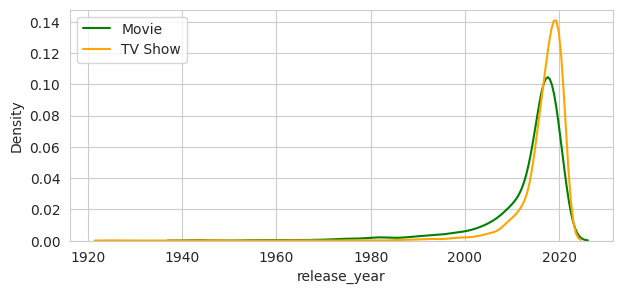

In [479]:
plt.figure(figsize=(7,3))
sns.kdeplot(data=df_new1.loc[df_new1['type']=='Movie']['release_year'],color='green')
sns.kdeplot(data=df_new1.loc[df_new1['type']=='TV Show']['release_year'],color='orange')
plt.legend(['Movie','TV Show'])

In [480]:
movies_1521=df_new1.loc[(df_new1['release_year']>=2015) & (df_new1['release_year']<=2022)]['type'].value_counts()[0]
tv_1521=df_new1.loc[(df_new1['release_year']>=2015) & (df_new1['release_year']<=2022)]['type'].value_counts()[1]
print('movies in [2015-2021] & % of total -',movies_1521,',',round(movies_1521*100/total_movies,2))
print('TV Shows in [2015-2021] & % of total-',tv_1521,',',round(tv_1521*100/T1,2))

movies in [2015-2021] & % of total - 4013 , 65.51
TV Shows in [2015-2021] & % of total- 2194 , 82.36


In [481]:
movies_1015=df_new1.loc[(df_new1['release_year']>=2010) & (df_new1['release_year']<2015)]['type'].value_counts()[0]
tv_1015=df_new1.loc[(df_new1['release_year']>=2010) & (df_new1['release_year']<2015)]['type'].value_counts()[1]
print('movies in [2010-2015) & % of total-',movies_1015,',',round(movies_1015*100/total_movies,2))
print('TV Shows in [2010-2015) & % of total -',tv_1015,',',round(tv_1015*100/T1,2))

movies in [2010-2015) & % of total- 960 , 15.67
TV Shows in [2010-2015) & % of total - 291 , 10.92


In [482]:
movies_0010=df_new1.loc[(df_new1['release_year']>=2000) & (df_new1['release_year']<2010)]['type'].value_counts()[0]
tv_0010=df_new1.loc[(df_new1['release_year']>=2000) & (df_new1['release_year']<2010)]['type'].value_counts()[1]
print('movies in [2000-2010) & % of total-',movies_0010,',',round(movies_0010*100/total_movies,2))
print('TV Shows in [2000-2010) & % of total -',tv_0010,',',round(tv_0010*100/T1,2))

movies in [2000-2010) & % of total- 677 , 11.05
TV Shows in [2000-2010) & % of total - 130 , 4.88


In [483]:
movies_00=df_new1.loc[(df_new1['release_year']<2000)]['type'].value_counts()[0]
tv_00=df_new1.loc[(df_new1['release_year']<2000)]['type'].value_counts()[1]
print('movies in [1925-2000) & % -',movies_00,',',round(movies_00*100/total_movies,2))
print('TV Shows in [1925-2000) & % -',tv_00,',',round(tv_00*100/T1,2))

movies in [1925-2000) & % - 476 , 7.77
TV Shows in [1925-2000) & % - 49 , 1.84






    Span of years  Year range      No. of movies    Increase in movies
      75           1925-1999         476      

      10           2000-2009         677                 42 %

      5            2010-2014         960                 41 %

      7            2015-2021         4013                318 %


    Span of years  Year range     No. of movies    Increase in movies
      75           1925-1999         49      

      10           2000-2009         130                 165 %

      5            2010-2014         291                 124 %

      7            2015-2021         2194                654 %

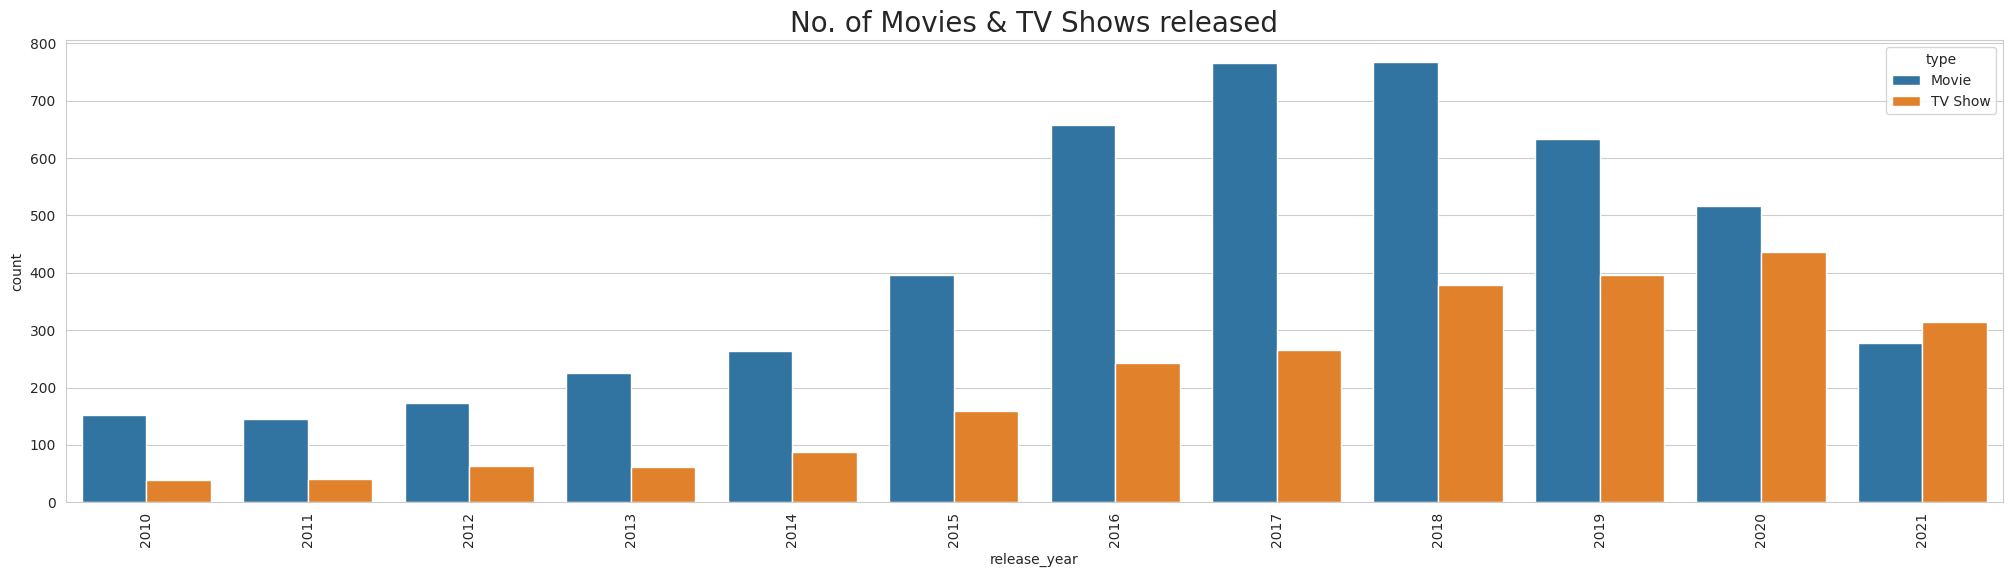

In [484]:
plt.figure(figsize=(25,6))
movies_95_21=df_new1.loc[(df_new1['release_year']>=2010) & (df_new1['release_year']<2022)]
sns.countplot(data=movies_95_21,x='release_year',hue='type')
plt.xticks(rotation=90)
plt.title('No. of Movies & TV Shows released',fontsize=20)
plt.show()

Highest no. of movies were released in 2017 & 2018 and highest no. of TV Shows were released in 2020 during Covid time.

Rise of streaming services like Netfl ix, Hotstar, and Amazon Prime Video has led to an increase in the no. of movies being produced. Theseservices always look for new content and to invest in big-budget movies which they can then exclusively stream. Also advancement intechnology have made it easier and cheaper to produce movies. This has led to an increase in the no. of independent fi lmmakers who are ableto make their own movies.

**Visual analysis on ratings**

**Rating Description for Movies**


    G            General Audiences( All ages admitted)     
    PG           Parental Guidance Suggested
    PG-13        Parents Strongly Cautioned (May be inappropriate for under 13 kids)
    R            R Restricted (Under 17 requires parent or adult guardian)
    NC-17        No One 17 and Under Admitted.
    NR           Not Rated. The film has not been rated by the MPAA.
    UR           Under Review. The film is currently being reviewed by the MPAA.      

**Rating Description for TV-Shows**

    TV-Y           All Children
    TV-Y7          Children 7 and Older
    TV-Y7-FV       Children 7 and Older – Fantasy Violence
    TV-G           General Audiences
    TV-PG          Parental Guidance Suggested
    TV-14          Parents Strongly Cautioned
    TV-MA          Mature Audience Only
    UR             Unrated. This program has not been rated by the TVPG.

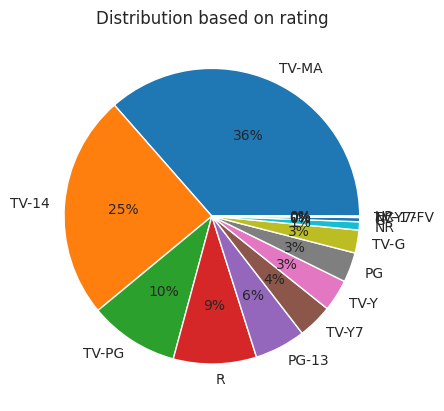

In [485]:
plt.pie(df_new1['rating'].value_counts(),labels =df_new1['rating'].value_counts().index,autopct='%.0f%%')
plt.xticks(rotation=90)
plt.title('Distribution based on rating')
plt.show()

In [486]:
rating_desc= {'TV-PG':'Parental Guidance',
              'TV-MA':'Mature Audience',
              'TV-Y7':'Teens',
              'TV-Y7-FV':'Teens',
              'TV-Y7':'Teens',
              'TV-14':'Teens',
              'R':'Mature Audience',
              'TV-Y':'General Audience',
              'NR':'Mature Audience',
              'PG-13':'Teens',
              'TV-G':'General Audience',
              'PG':'Parental Guidance',
              'G':'General Audience',
              'UR':'Mature Audience',
              'NC-17':'Mature Audience'}

In [487]:
df_new1['Target_audience'] = df_new1['rating'].replace(rating_desc)

<ipython-input-487-782d0aaa47fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Target_audience'] = df_new1['rating'].replace(rating_desc)


<ipython-input-488-e56bd07fe36a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['Target_audience']=df_new1['Target_audience'].fillna('NA')


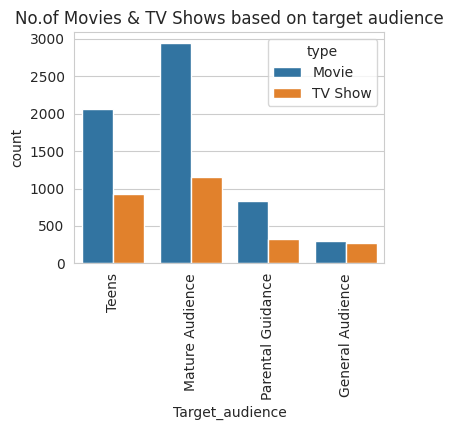

In [488]:
df_new1['Target_audience']=df_new1['Target_audience'].fillna('NA')
y3 = df_new1.loc[~df_new1['Target_audience'].str.contains('min')]
plt.figure(figsize=(4,3))
sns.countplot(data=y3,x='Target_audience',hue='type')
plt.xticks(rotation=90)
plt.title('No.of Movies & TV Shows based on target audience')
plt.show()

**Visual analysis on countries**

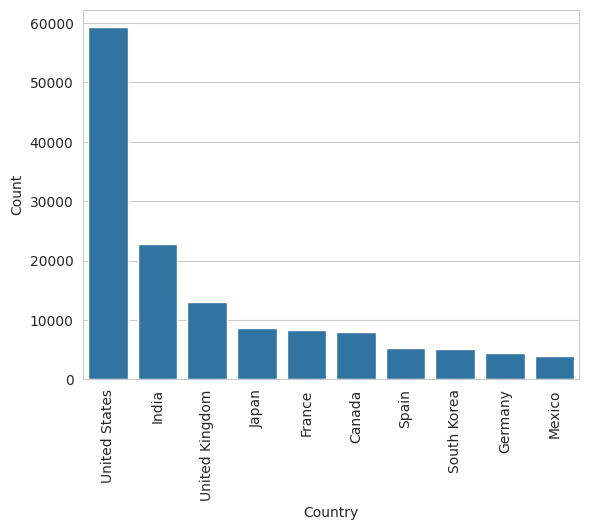

In [489]:
con_y=df_new.loc[~(df_new['country']=='NA')]['country'].value_counts()[:10]
con_x=con_y.index
sns.barplot(x= con_x, y= con_y)
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='country', ylabel='count'>

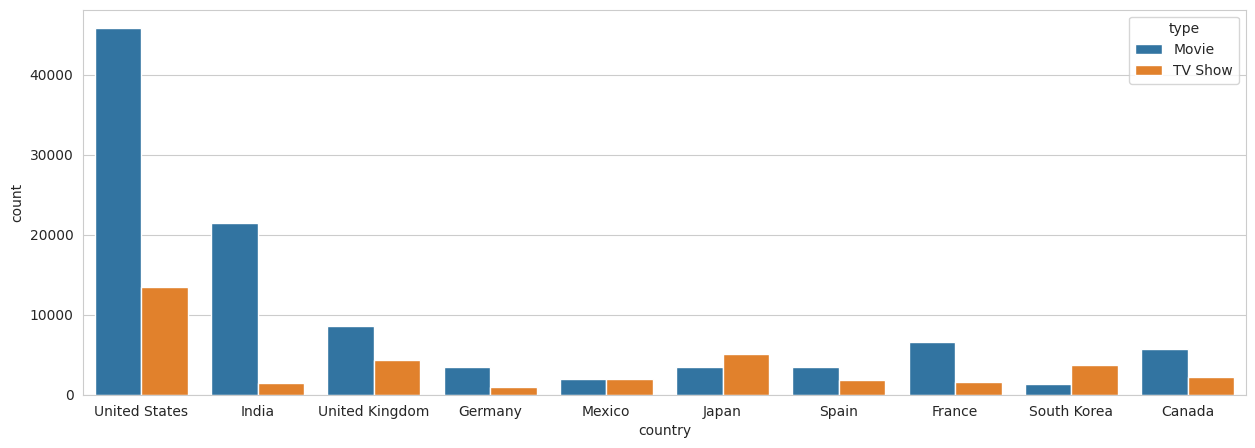

In [490]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_new.loc[df_new['country'].isin(con_x)],x='country',hue='type')

Top 3 countries producing highest no. of Movies are US, India, UK & highest no. of TV Shows are US, UK, Japan.

In [491]:
df_new.loc[~(df_new['country']=='NA')].groupby('country')['genre'].value_counts()

country       genre                 
              International Movies      40
              Dramas                    39
              Classic Movies             9
              Independent Movies         8
              International TV Shows     4
                                        ..
West Germany  Documentaries              2
Zimbabwe      International Movies      15
              Comedies                  12
              Romantic Movies           12
              Documentaries              3
Name: genre, Length: 1415, dtype: int64

<Axes: xlabel='country', ylabel='genre'>

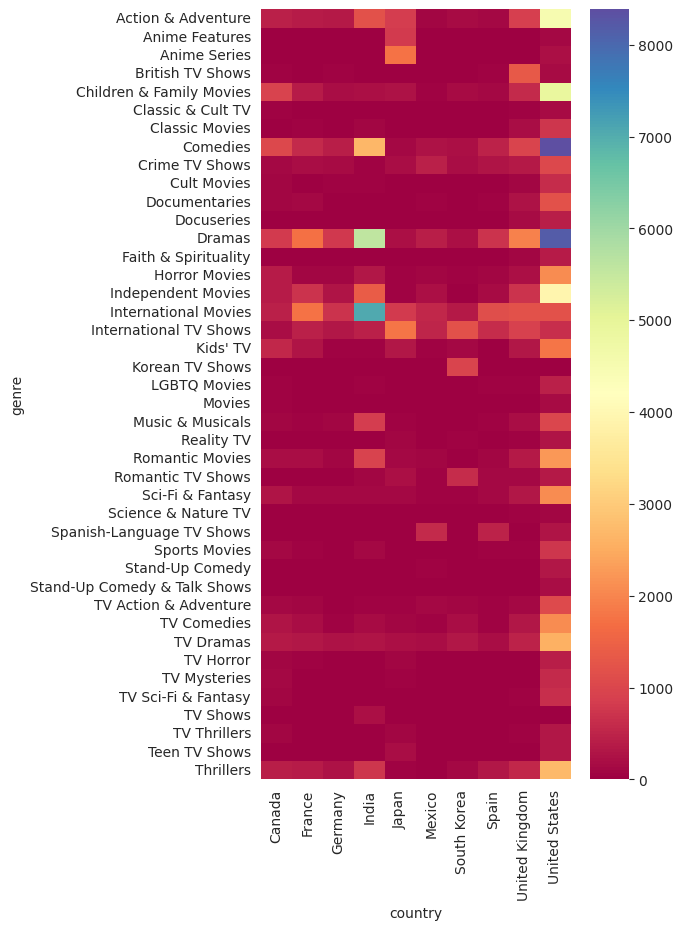

In [492]:
plt.figure(figsize=(5,10))
df_nna_con = df_new.loc[~(df_new['country']=='NA')]
top10_con = df_nna_con.loc[df_nna_con['country'].isin(con_x)]
sns.heatmap(pd.crosstab(top10_con['genre'],top10_con['country']),cmap='Spectral')

US has good amount of Movies/TV Shows in Dramas, Comedies, Action & Adeventure, Children & Family Movies, Independent Movies, TVDramas, Thrillers, Sci-Fi & Fantasy, Romantic Movies.

India has a lot of International Movies, Dramas, Comedies & fair amount of IndependentMovies, Action & Adeventure, Music & Musicals, Romantic Movies.

Independent Movies, Independent TV Shows, Dramas, Comedies are usually in every top country.

**Visuaal analysis on Cast**

**Movies**

In [493]:
df_new['cast']=df_new['cast'].str.strip()
df_new.loc[df_new['type']=='Movie']['cast'].value_counts()[1:11]

Liam Neeson          161
Alfred Molina        157
John Krasinski       138
Salma Hayek          130
Frank Langella       128
Anupam Kher          118
John Rhys-Davies     116
Shah Rukh Khan       108
Naseeruddin Shah     106
Quvenzhané Wallis    100
Name: cast, dtype: int64

<Axes: xlabel='cast', ylabel='None'>

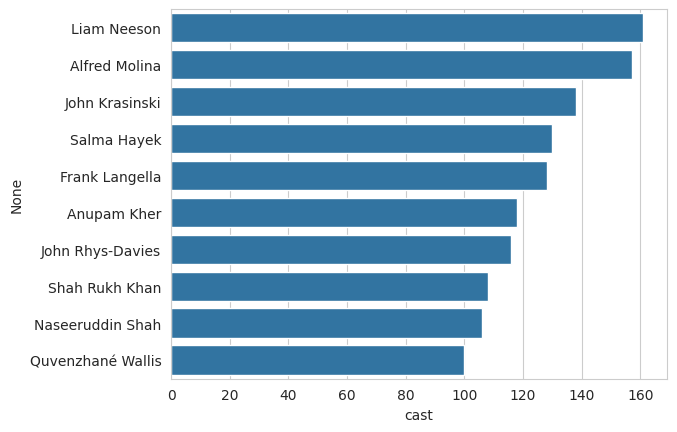

In [494]:
cast_y=df_new.loc[df_new['type']=='Movie']['cast'].value_counts()[1:11]
sns.barplot(y=cast_y.index,x=cast_y)

Top 3 cast for movies world are Liam Neeson, Alfred Molina, John Krasinski. Liam Neeson & Alred are working from the past 45 years.

**TV Show**

<Axes: xlabel='cast', ylabel='None'>

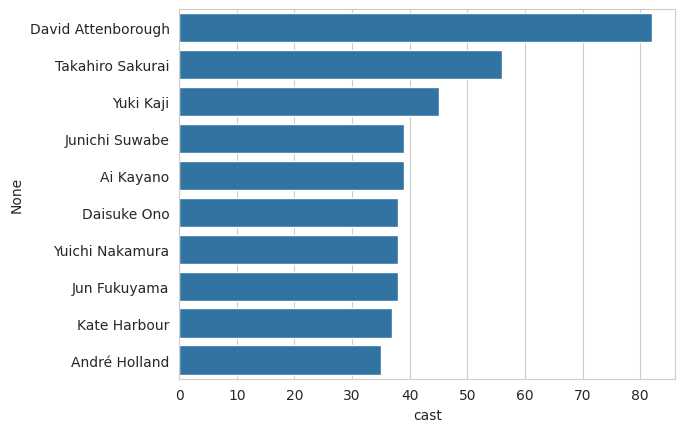

In [495]:
cast_ty=df_new.loc[df_new['type']=='TV Show']['cast'].value_counts()[1:11]
sns.barplot(y=cast_ty.index,x=cast_ty)

Top 3 cast for TV Shows are David Attenborough, Takahiro Sakurai & Yuki Kaji.

<Axes: xlabel='type', ylabel='cast'>

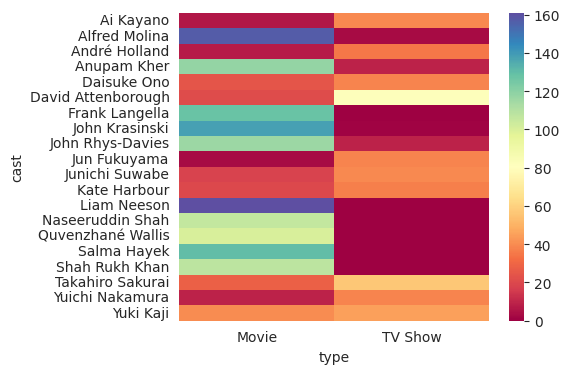

In [496]:
top10_cas=df_new.loc[df_new['cast'].isin(cast_y.index) | df_new['cast'].isin(cast_ty.index)]
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(top10_cas['cast'],top10_cas['type']),cmap='Spectral')

In [497]:
df_new['cast'].value_counts()

NA                2149
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Shelby Alicea        1
Alex Lora            1
Eddie Griffin        1
Kristyl Tift         1
Richard Neil         1
Name: cast, Length: 36393, dtype: int64

<Axes: xlabel='country', ylabel='cast'>

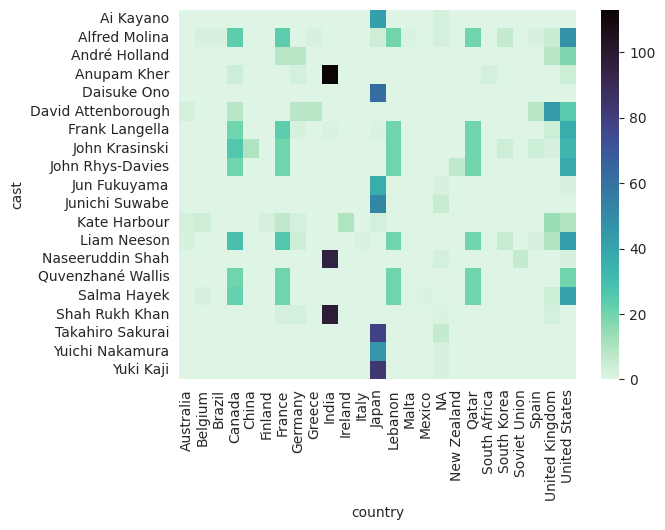

In [498]:
sns.heatmap(pd.crosstab(top10_cas['cast'],top10_cas['country']),cmap='mako_r')

Actors who have done a lot of work in Movies/TV shows are from US, India, Japan, UK.

<Axes: xlabel='genre', ylabel='cast'>

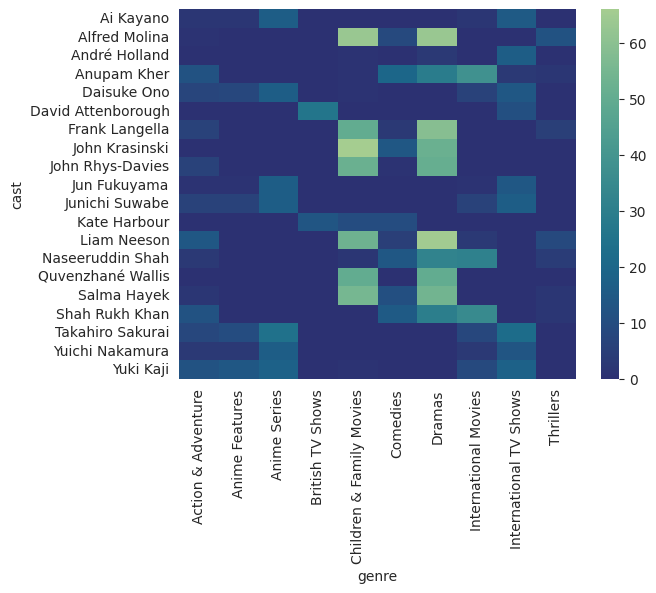

In [499]:
top10_cas_gen=top10_cas['genre'].value_counts()[:10].index
sns.heatmap(pd.crosstab(top10_cas['cast'],top10_cas.loc[top10_cas['genre'].isin(top10_cas_gen)]['genre']),cmap='crest_r')

Top actors mostly work in genre - Children & Family Movies & Dramas

**Visual analysis on Genre**

**Movies**

In [500]:
df_new.loc[df_new['type']=='Movie']['genre'].value_counts()[:10]

Dramas                      29796
International Movies        28240
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7106
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Name: genre, dtype: int64

<Axes: xlabel='genre', ylabel='None'>

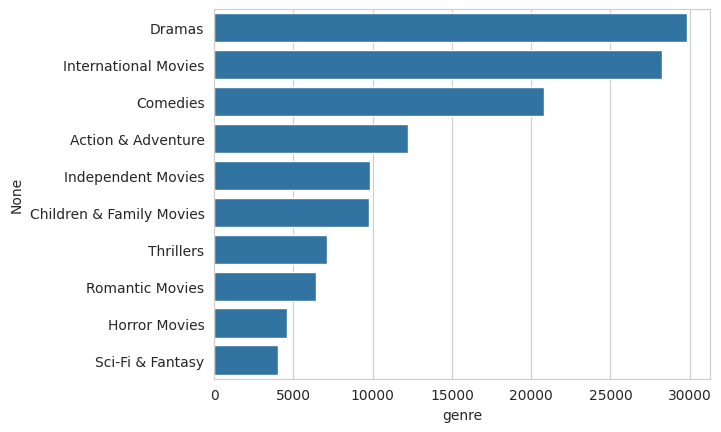

In [501]:
gen_y=df_new.loc[df_new['type']=='Movie']['genre'].value_counts()[:10]
sns.barplot(y=gen_y.index,x=gen_y)

Top 3 Genre for Movies:
**1)**
Drama
**2)**
International movies
**3)**
Comedies

**TV Shows**

<Axes: xlabel='genre', ylabel='None'>

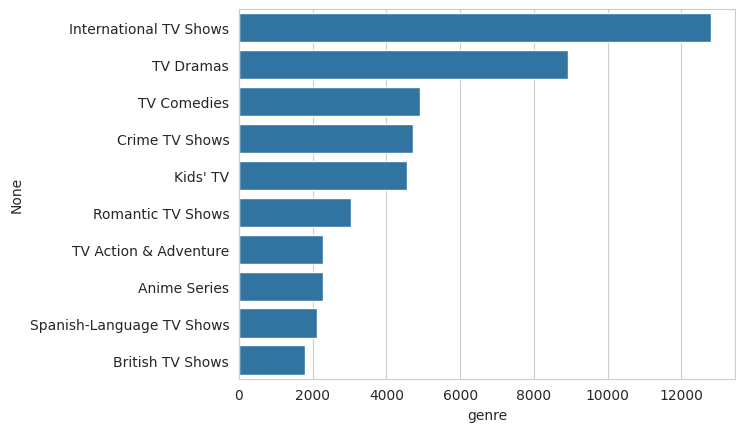

In [502]:
gen_ty=df_new.loc[df_new['type']=='TV Show']['genre'].value_counts()[:10]
sns.barplot(y=gen_ty.index,x=gen_ty)

Top 3 Genre for TV Show:
**1)**
International TV Show
**2)**
TV Drama
**3)**
TV Comedies

<Axes: xlabel='type', ylabel='genre'>

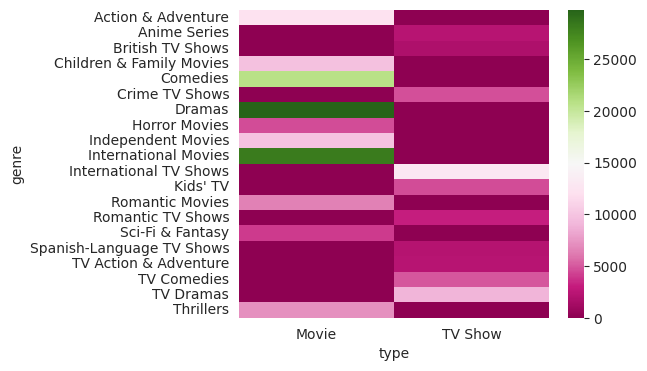

In [503]:
top10_gen=df_new.loc[(df_new['genre'].isin(gen_y.index)) | (df_new['genre'].isin(gen_ty.index))]
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(top10_gen['genre'],top10_gen['type']),cmap='PiYG')

**Visual analysis on Directors**

**Movies**

In [504]:
df_new['director']=df_new['director'].str.strip()
df_mov=df_new.loc[~(df_new['type']=='Movie')]
df_mov.loc[~(df_mov['director']=='NA')]['director'].value_counts()[:10]

Noam Murro          189
Thomas Astruc       160
Laïla Marrakchi     104
Alan Poul           104
Houda Benyamina     104
Damien Chazelle     104
Rob Seidenglanz     103
Alejandro Lozano     90
Jay Oliva            81
Manolo Caro          78
Name: director, dtype: int64

<Axes: xlabel='director', ylabel='None'>

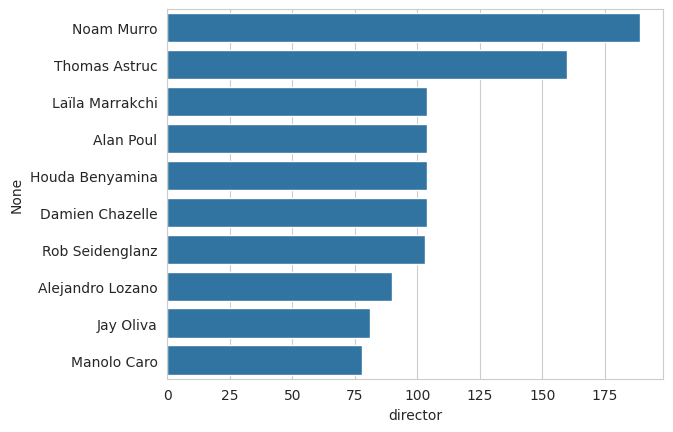

In [505]:
dir_y=df_mov.loc[~(df_mov['director']=='NA')]['director'].value_counts()[:10]
sns.barplot(y=dir_y.index,x=dir_y)

Top directors in Movies are Noam Murro, Thomas Astruc, Laïla Marrakchi, Alan Poul, Houda Benyamina, Damien Chazelle, Rob Seidenglanz.

**TV Shows**

In [506]:
df_new['director']=df_new['director'].str.strip()
df_tv=df_new.loc[~(df_new['type']=='TV Show')]
df_tv.loc[~(df_tv['director']=='NA')]['director'].value_counts()[:10]

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: director, dtype: int64

<Axes: xlabel='director', ylabel='None'>

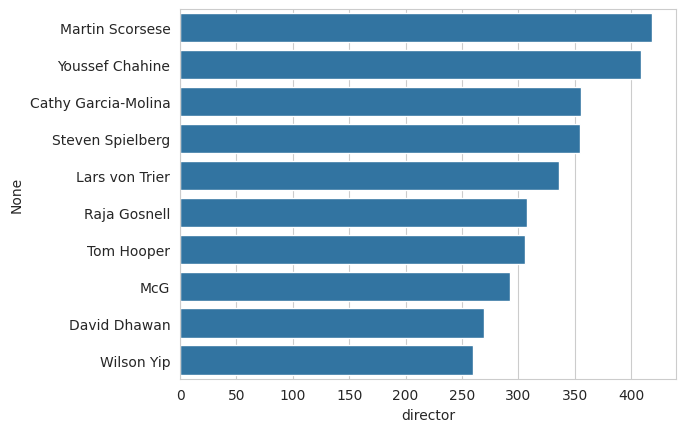

In [507]:
dir_ty=df_tv.loc[~(df_tv['director']=='NA')]['director'].value_counts()[:10]
sns.barplot(y=dir_ty.index,x=dir_ty)

Top directors for TV Shows are Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina.

<Axes: xlabel='type', ylabel='director'>

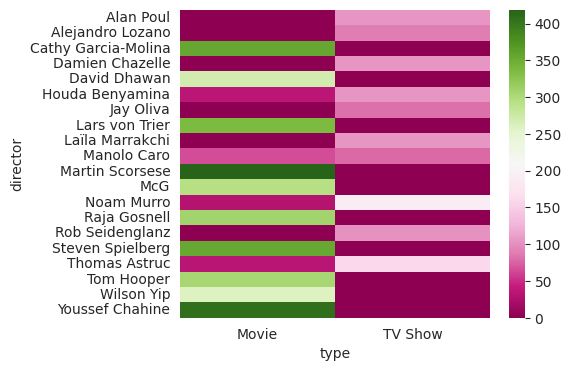

In [508]:
top10_dir=df_new.loc[(df_new['director'].isin(dir_y.index)) | (df_new['director'].isin(dir_ty.index))]
plt.figure(figsize=(5,4))
sns.heatmap(pd.crosstab(top10_dir['director'],top10_dir['type']),cmap='PiYG')

<Axes: xlabel='director', ylabel='genre'>

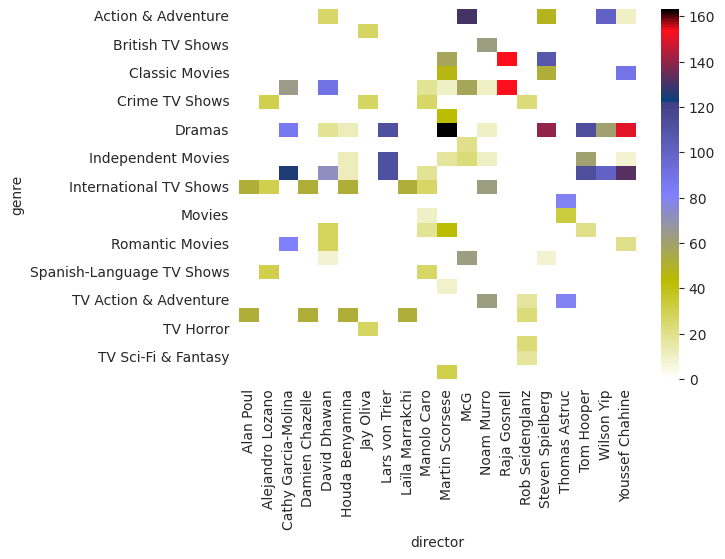

In [509]:
sns.heatmap(pd.crosstab(top10_dir['genre'],top10_dir['director']),cmap='gist_stern_r')

<Axes: xlabel='country', ylabel='director'>

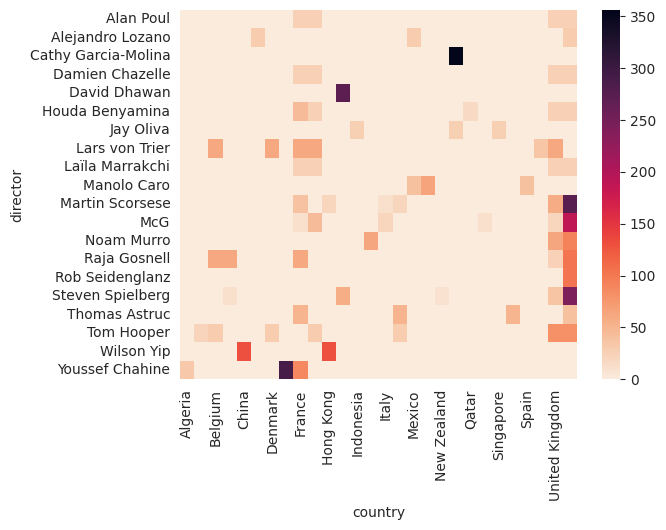

In [510]:
sns.heatmap(pd.crosstab(top10_dir['director'],top10_dir['country']),cmap='rocket_r')

**Correlation between top 10 cast, director, country, genre using heat map**

In [511]:
top10_data=df_new.loc[(df_new['cast'].isin(top10_cas['cast'])) & (df_new['country'].isin(con_x)) & (df_new['director'].isin(top10_dir['director']))]

top10_data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre,month_added,mon_name_added,year_added
2553,s2554,TV Show,The Eddy,2020-05-08,2020,TV-MA,1 Season,The owner of a Paris jazz club gets tangled up...,André Holland,Damien Chazelle,United Kingdom,International TV Shows,5,May,2020
7941,s7958,Movie,Schindler's List,2018-04-01,1993,R,195 min,Oskar Schindler becomes an unlikely humanitari...,Liam Neeson,Steven Spielberg,United States,Classic Movies,4,April,2018
22936,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,2021-08-27,2001,TV-14,150 min,The life and career of a lawyer are thrown int...,Anupam Kher,David Dhawan,India,Comedies,8,August,2021
34626,s7072,Movie,Indiana Jones and the Last Crusade,2019-01-01,1989,PG-13,127 min,"Accompanied by his father, Indiana Jones sets ...",John Rhys-Davies,Steven Spielberg,United States,Action & Adventure,1,January,2019
34627,s7073,Movie,Indiana Jones and the Raiders of the Lost Ark,2019-01-01,1981,PG,116 min,When Indiana Jones is hired by the government ...,John Rhys-Davies,Steven Spielberg,United States,Action & Adventure,1,January,2019


<Axes: xlabel='country', ylabel='genre'>

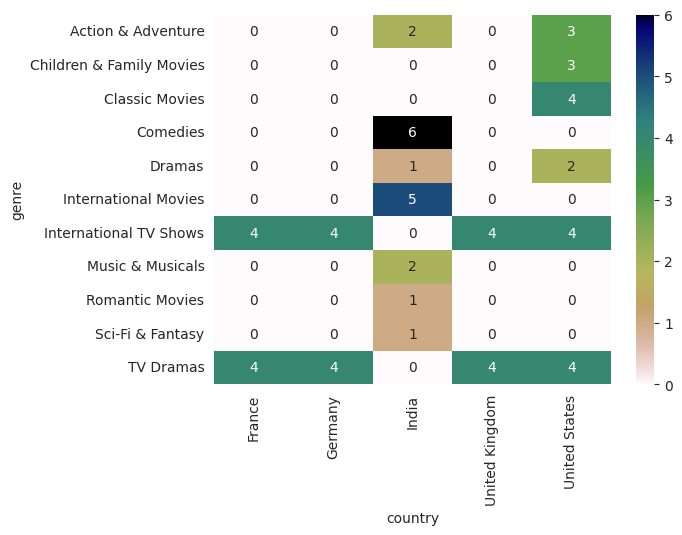

In [512]:
sns.heatmap(pd.crosstab(top10_data['genre'],top10_data['country']),annot=True,cmap='gist_earth_r')

<Axes: xlabel='year_added', ylabel='genre'>

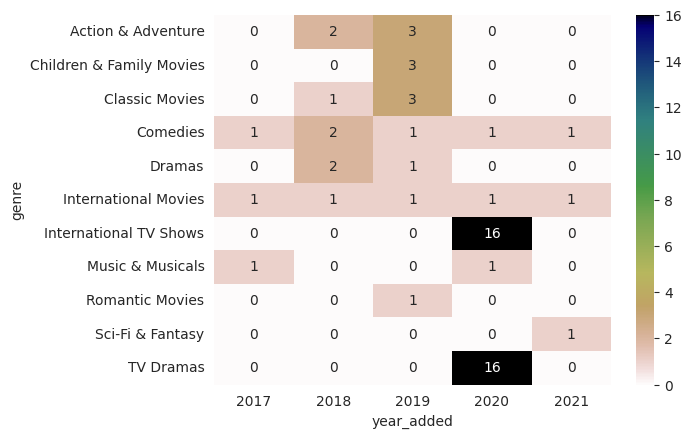

In [513]:
sns.heatmap(pd.crosstab(top10_data['genre'],top10_data['year_added']),annot=True,cmap='gist_earth_r')

<Axes: xlabel='type', ylabel='country'>

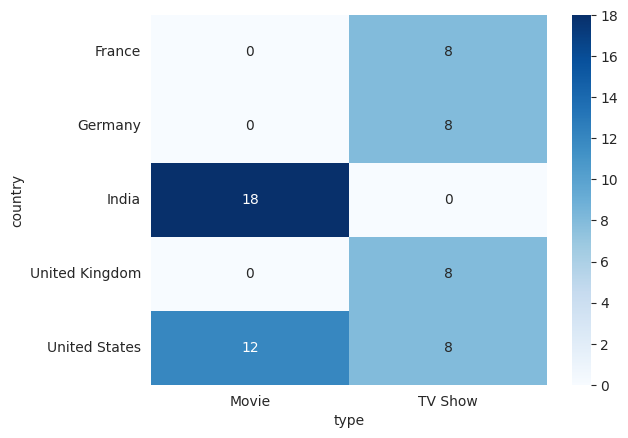

In [514]:
sns.heatmap(pd.crosstab(top10_data['country'],top10_data['type']),annot=True,cmap='Blues')

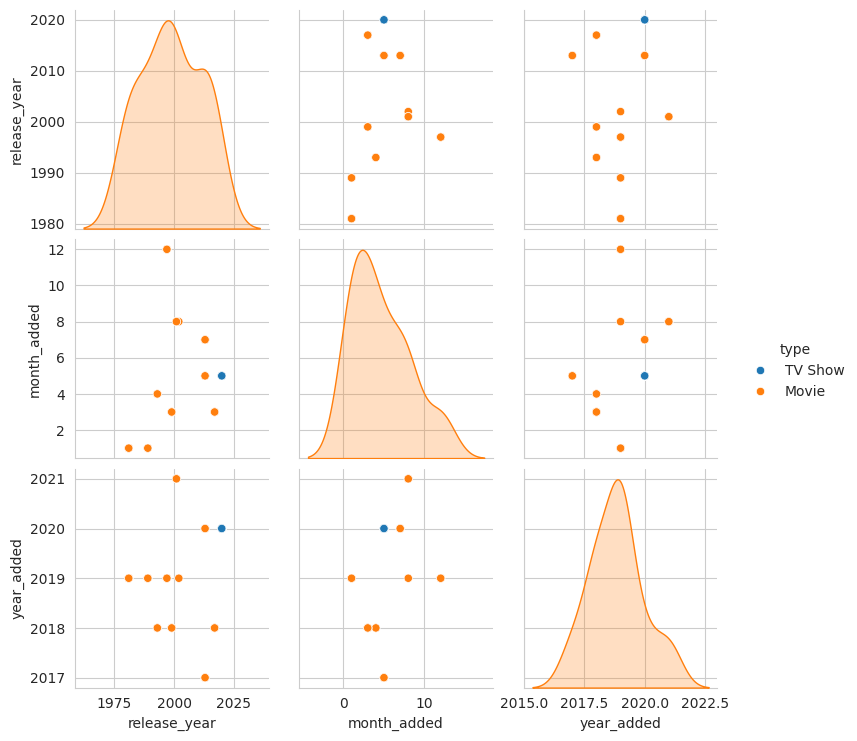

In [515]:
sns.pairplot(data=top10_data,hue='type')

# **Insights**

1. No. of movies are more than TV Shows in Netfl
ix - 70% are movies and 30% TV Shows
2. 66% movies have duration between 90 & 150 min
& 30% movies have duration <90 min.
3. Median value of the duration of the movies - 98.0 min.
4. 83% of TV shows have seasons 1 or 2.
5. Highest no. of Movies & TV Shows were added i
n year 2019. In year 2020 and 2021, there were les
s Movies & TV Shows were released due to Covid
6. Number of movies added is highest in 2019 fol
lowed by 2020 and 2018.
Number of TV Shows added is highest in 2020 follow
ed by 2019 and 2021
We can observe that during Coivd time popularity o
f TV Shows was increased. The reasons behind this
popularity is the increase in time at home, th
7. Most of the Movies were added in July, Januar
y & December.
8. Most of the TV shows were added in month Dece
mber, July, August.
9. According to the data, most of the shows were
added in month of December & July. Therefore, bes
t time to launch a show is in the month of Dec
10.
       Span of years  Year Range   No of Movies  Increase in Movies
          75           1925-1999      476
          10           2000-2009      677                42 %
          5            2010-2014      960                41 %
          7            2015-2021      4013               318 %

        Span of years   Year Range  No of TV Shows  Increase in TV Shows
          75             1925-1999       49
          10             2000-2009       130            165 %
          5              2010-2014       291            124 %
          7              2015-2021       2194           654 %

Rise of streaming services like Netflix, Hotstar,
and Amazon Prime Video has led to an increase in t
he no. of movies being produced. These service
Also advancement in technology have made it easier
and cheaper to produce movies. This has led to an
increase in the no. of independent filmmakers
11. Most of the Movies and TV Shows are for Mutu
red audience followed by Teens audience.
12. Top 3 countries producing highest no. of Mov
ies are US, India, UK & highest no. of TV Shows ar
e US, UK, Japan.
13. Country US has good amount of Movies/TV Show
s in Dramas, Comedies, Action & Adeventure, Childr
en & Family Movies, Independent Movies, TV Dra
14. Most of the Movies and TV Shows are for Mutu
red audience followed by Teens audience.
15. Top 3 cast for movies world are Liam Neeson,
Alfred Molina , John Krasinski.
16. Actors who have done a lot of work in Movies
/TV shows are from US, India, Japan, UK.
17. Top actors mostly work in genre - Children &
Family Movies & Dramas.
18. Top 3 Genre for Movies: 1) Drama 2) Internat
ional movies 3) Comedies.
19. Top 3 Genre for TV Show: **1)** Internationa
l TV Show **2)** TV Drama **3)** TV Comedies
20. Top directors in Movies are Noam Murro,
Thomas Astruc, Laïla Marrakchi, Alan Poul, Houda
Benyamina, Damien Chazelle, Rob Seidenglanz.
21. Top directors for TV Shows are Martin Scorse
se, Youssef Chahine, Cathy Garcia-Molina.

# **Recommendations**

1. If Netflix is adding any Movie or TV Show on
the platform, then it should be added on months of
July and December due to the Summer break and
2. As the most famous genres are Dramas, Interna
tional Movies & Comedies therefore Netflix should
add more content related to these genres.
3. As the popularity is increasing in India, UK
& Japan after US therefore more content should be
added in India, UK & Japan.
4. As Movies having duration of 100 min are more
popular, Netflix should focus on adding those mov
ies which have duration of around 1.5hr..
5. As TV Shows having no of seasons 1 & 2 are mo
re popular, Netflix should focus on these kinds of
TV Shows.